In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import TensorDataset,DataLoader
import os
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

In [ ]:

# data = pd.read_csv("smallplants/smalltrain.csv")
# data = data.fillna(0)
# data.to_csv('smallplants/to_train.csv', index=False)

# # data = pd.read_csv("smallplants/test.csv")
# # data = data.fillna(0)
# # data.to_csv('smallplants/to_test.csv', index=False)

# data = pd.read_csv("PlantsTraits/test.csv")
# data = data.fillna(0)
# data.to_csv('PlantsTraits/to_test.csv', index=False)

In [ ]:

data = pd.read_csv("smallplants/to_train.csv")

features = torch.tensor(data.drop(['X4_mean','X11_mean','X18_mean','X26_mean','X50_mean','X3112_mean','X4_sd','X11_sd','X18_sd','X26_sd','X50_sd','X3112_sd'],axis=1).values,dtype=torch.float32)
label = torch.tensor(data[['X4_mean','X11_mean','X18_mean','X26_mean','X50_mean','X3112_mean','X4_sd','X11_sd','X18_sd','X26_sd','X50_sd','X3112_sd']].values,dtype=torch.float32)
# 求每列的最小值和最大值
min1 = features.min(dim=0).values
max1 = features.max(dim=0).values
features = (features - min1) / (max1 - min1)
print("features:")
print("min:",min1,"max-min:",max1-min1)
min2 = label.min(dim=0).values
max2 = label.max(dim=0).values
label = (label - min2) / (max2 - min2)
print("label:")
print("min:",min2,"max-min:",max2-min2)
print(features[:10,:])
print(label[:10,:])

dataset = TensorDataset(features,label)
print(dataset[0])
datald = DataLoader(dataset,batch_size=10,shuffle=False)
inf = [dataset[0][0].shape[0],dataset[0][1].shape[0]]
print(inf)

In [ ]:
t_data = pd.read_csv("smallplants/to_test.csv")

t_features = torch.tensor(t_data.drop(['X4_mean','X11_mean','X18_mean','X26_mean','X50_mean','X3112_mean','X4_sd','X11_sd','X18_sd','X26_sd','X50_sd','X3112_sd'],axis=1).values,dtype=torch.float32)
t_label = torch.tensor(t_data[['X4_mean','X11_mean','X18_mean','X26_mean','X50_mean','X3112_mean','X4_sd','X11_sd','X18_sd','X26_sd','X50_sd','X3112_sd']].values,dtype=torch.float32)
# 求每列的最小值和最大值
t_min1 = t_features.min(dim=0).values
t_max1 = t_features.max(dim=0).values
t_features = (t_features - t_min1) / (t_max1 - t_min1)
print("features:")
print("min:",t_min1,"max-min:",t_max1-t_min1)
t_min2 = t_label.min(dim=0).values
t_max2 = t_label.max(dim=0).values
t_label = (t_label - t_min2) / (t_max2 - t_min2)
print("label:")
print("min:",t_min2,"max-min:",t_max2-t_min2)
print(t_features[:10,:])
print(t_label[:10,:])

t_idx = t_data['id'].values

t_dataset = TensorDataset(t_features,t_label)
t_datald = DataLoader(t_dataset,batch_size=10,shuffle=False)
print(t_dataset[0][0].shape,t_dataset[0][1].shape)

In [42]:
t_data = pd.read_csv("PlantsTraits/to_test.csv")

t_features = torch.tensor(t_data.values,dtype=torch.float32)

# 求每列的最小值和最大值
t_min1 = t_features.min(dim=0).values
t_max1 = t_features.max(dim=0).values
t_features = (t_features - t_min1) / (t_max1 - t_min1)
print("features:")
print("min:",t_min1,"max-min:",t_max1-t_min1)

t_idx = t_data['id'].values

t_dataset = TensorDataset(t_features)
t_datald = DataLoader(t_dataset,batch_size=10,shuffle=False)
print(t_dataset[0][0].shape)

features:
min: tensor([ 2.1778e+04, -1.3569e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.3056e+01,  7.6357e+00,  3.0000e+01,  6.3000e+01,  6.0000e+01,
         6.2000e+01,  3.8000e+01,  6.2000e+01,  4.4000e+01,  2.9000e+01,
         3.0000e+01,  2.9000e+01,  3.4000e+01,  3.0000e+01,  1.0000e+00,
         1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
         1.7000e+01,  2.6000e+01,  1.9000e+01,  2.0000e+01,  1.8000e+01,
         2.4000e+01,  2.2000e+01,  7.0000e+00,  2.3000e+01,  1.6000e+01,
         2.3000e+01,  1.0000e+01,  5.7000e+01,  1.8000e+01,  5.0000e+01,
         3.7000e+01,  5.3000e+01,  2.6000e+01,  6.0000e+00,  4.0000e+01,
         4.6000e+01,  4.1000e+01,  4.3000e+01,  4.1000e+01,  4.5000e+01,
         3.1000e+01,  2.2000e+01,  2.9000e+01,  2.1000e+01,  3.1000e+01,
         1.9000e+01,  1.9000e+01,  2.0000e+01,  1.8000e+01,  1.8000e+01,
         2.0000e+01,  1.9000e+01,  1.5000e+01,  6.0000e+00,  1.3000e+01,
         8.0000e+00,  1.1000e+01,  5

In [ ]:


class CustomImageDataset(Dataset):
    def __init__(self, root_dir,dataset, transform=None):
        self.data = dataset
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [os.path.join(root_dir, filename) for filename in os.listdir(root_dir)]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert('RGB')
        data = self.data[idx]
        if self.transform:
            image = self.transform(image)

        return image,data


In [43]:
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize(0.5,0.5),
    ]
)

pic_set = CustomImageDataset('smallplants/picture',transform=transform,dataset=dataset)
picld = DataLoader(pic_set,batch_size=10,shuffle=True)
print(pic_set[0][1])

t_pic_set = CustomImageDataset('PlantsTraits/test_images',transform=transform,dataset=t_dataset)
t_picld = DataLoader(t_pic_set,batch_size=10,shuffle=False)
print(t_pic_set[0][0].shape)

(tensor([0.0000, 0.8252, 0.3426, 0.2803, 0.1791, 0.1222, 0.1163, 0.5955, 0.5256,
        0.6190, 0.5750, 0.6235, 0.5190, 0.3187, 0.2301, 0.2465, 0.2201, 0.2709,
        0.2283, 0.1717, 0.3477, 0.2661, 0.3040, 0.2303, 0.3132, 0.6644, 0.5732,
        0.5765, 0.4960, 0.6635, 0.5397, 0.1944, 0.0579, 0.1039, 0.1319, 0.1433,
        0.0691, 0.4164, 0.0232, 0.1799, 0.0556, 0.2956, 0.0258, 0.4083, 0.2500,
        0.1622, 0.2326, 0.2250, 0.2558, 0.1842, 0.3994, 0.4233, 0.4012, 0.4206,
        0.4178, 0.4058, 0.3504, 0.3835, 0.3753, 0.4507, 0.3536, 0.4197, 0.1719,
        0.0200, 0.0738, 0.0775, 0.1093, 0.0258, 0.0664, 0.2990, 0.0401, 0.0545,
        0.6319, 0.0672, 0.4740, 0.0397, 0.0667, 0.5984, 0.0898, 0.5378, 0.0524,
        0.0852, 0.6104, 0.0916, 0.4698, 0.0539, 0.0734, 0.5962, 0.0564, 0.3114,
        0.0337, 0.0485, 0.6177, 0.0565, 0.3394, 0.0368, 0.0529, 0.5703, 0.0871,
        0.4978, 0.0570, 0.0816, 0.5207, 0.0983, 0.5949, 0.0935, 0.1377, 0.5201,
        0.0564, 0.4858, 0.0325, 0.0581,

In [ ]:


class pic(nn.Module):
    def __init__(self,out_s):
        super().__init__()
        self.first = nn.Sequential(
                    nn.Conv2d(3,16,kernel_size=7,padding=3),# 3*512*512 -> 16*512*512
                    nn.BatchNorm2d(16),
                    nn.MaxPool2d(kernel_size=2,stride=2),# 16*512*512 -> 16*256*256
                    nn.ReLU(),
                    )
        self.middle1 = nn.Sequential(
                    nn.Conv2d(16,32,kernel_size=3,padding=1),# 16*256*256 -> 32*256*256
                    nn.BatchNorm2d(32),
                    nn.MaxPool2d(kernel_size=2,stride=2),# 32*256*256 -> 32*128*128
                    nn.ReLU(),
                    )
        self.middle2 = nn.Sequential(
                    nn.Conv2d(32,128,kernel_size=3,padding=1),# 32*128*128 -> 128*128*128
                    nn.BatchNorm2d(128),
                    nn.MaxPool2d(kernel_size=2,stride=2),# 128*128*128 -> 128*64*64
                    nn.ReLU(),
                    )
        self.middle3 = nn.Sequential(
                    nn.Conv2d(128,32,kernel_size=3,padding=1),# 128*64*64 -> 32*64*64
                    nn.BatchNorm2d(32),
                    nn.MaxPool2d(kernel_size=2,stride=2),# 32*64*64 -> 32*32*32
                    nn.ReLU(),
                    )
        self.final = nn.Sequential(
                    nn.Conv2d(32,8,kernel_size=3,padding=1),# 32*32*32 -> 8*32*32
                    nn.BatchNorm2d(8),
                    nn.MaxPool2d(kernel_size=2,stride=2),# 8*32*32-> 8*16*16
                    nn.ReLU(),
                    )
        self.pre = nn.Sequential(
                    nn.Linear(8*16*16,256),
                    nn.Linear(256,out_s),
                    nn.Sigmoid(),
                    )
    def forward(self,x):
        out = self.first(x)
        out = self.middle1(out)
        out = self.middle2(out)
        out = self.middle3(out)
        out = self.final(out)
        out = out.view(-1,8*16*16)
        out = self.pre(out)
        return out

class lin(nn.Module):
    def __init__(self,in_s,out_s):
        super().__init__()
        self.l1 = nn.Sequential(nn.Linear(in_s,256),nn.BatchNorm1d(256),nn.Sigmoid())
        self.l2 = nn.Sequential(nn.Linear(256,64),nn.BatchNorm1d(64),nn.ReLU())
        self.l3 = nn.Sequential(nn.Linear(64,32),nn.BatchNorm1d(32),nn.ReLU())
        self.l4 = nn.Sequential(nn.Linear(32,out_s),nn.Sigmoid())
    def forward(self,x):
        out = self.l1(x)
        out = self.l2(out)
        out = self.l3(out)
        out = self.l4(out)
        return out

class aiz(nn.Module):
    def __init__(self,in_s,out_s):
        super().__init__()
        self.pic_features = pic(out_s)
        self.trans = nn.Sequential(nn.Linear(out_s,out_s),nn.ReLU())
        self.csv_features = lin(in_s,out_s)
    def forward(self,img,csv):
        out1 = self.pic_features(img)
        out2 = self.csv_features(csv)
        #print(out1,out2)
        #out = self.trans(out1+out2)
        out = out1+out2
        return out



--------------------------------------------------
epoch: 0 loss: 0.8717823028564453
--------------------------------------------------
epoch: 0 loss: 2.205259084701538
--------------------------------------------------
epoch: 1 loss: 1.139981746673584
--------------------------------------------------
epoch: 1 loss: 1.4827098846435547
--------------------------------------------------
epoch: 2 loss: 1.054236650466919
--------------------------------------------------
epoch: 2 loss: 1.4358433485031128
--------------------------------------------------
epoch: 3 loss: 0.7090840339660645
--------------------------------------------------
epoch: 3 loss: 0.6303786635398865
--------------------------------------------------
epoch: 4 loss: 1.2182008028030396
--------------------------------------------------
epoch: 4 loss: 2.167384624481201
--------------------------------------------------
epoch: 5 loss: 1.1497032642364502
--------------------------------------------------
epoch: 5 loss: 1.2

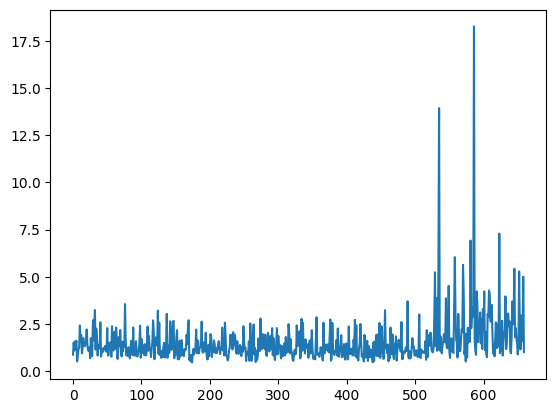

In [37]:
model = aiz(inf[0],12).to('cuda')
flag = 1
if flag:
    model.load_state_dict(torch.load('checkpoint/plant.pt'))
mloss = nn.MSELoss(reduction='sum')
# mloss =  nn.BCELoss()# nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3)
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-2,momentum=0.5,weight_decay = 0.01)

losses = []
for e in range(20):
    for idx,(img,(csv,label)) in enumerate(picld):
        img,csv,label = img.cuda(),csv.cuda(),label.cuda()
        mean=label[:,:-6]
        std=label[:,-6:]
        out = model(img,csv)
        if e>15:
            out = torch.normal(mean=out[:,0:6], std=out[:,6:12])
            label = torch.normal(mean=mean, std=std)

#         loss = mloss(label*(max2-min2).cuda(),out*(max2-min2).cuda())
        loss = mloss(label,out)
        losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if idx%20 == 0:
            print("-"*50)
            print("epoch:",e,"loss:",loss.item())
#             print(out.shape,label.shape)
#             print("out","\n",out,"label","\n",label)
            
plt.plot(losses)

In [38]:
torch.save(model.state_dict(), './checkpoint/plant.pt')

In [47]:
X4 = []
X11 = []
X18 = []
X26 = []
X50 = []
X3112 = []

try:
    model
except:
    model = aiz(inf,inf[1]).to('cuda')
    model.load_state_dict(torch.load('checkpoint/plant.pt'))
    model.eval()
for idx,(img,csv) in enumerate(t_picld):
    #print(idx)
    img,csv = img.cuda(),csv[0].cuda()
    out = model(img,csv)
#     out = torch.normal(mean=out[:,0:6], std=out[:,6:12])
#     out = (out.cpu().detach()*(max2[0:6]-min2[0:6])+min2[0:6]).numpy()
    out = (out.cpu().detach()*(max2-min2)+min2).numpy()
    X4.extend(out[:,0])
    X11.extend(out[:,1])
    X18.extend(out[:,2])
    X26.extend(out[:,3])
    X50.extend(out[:,4])
    X3112.extend(out[:,5])
#     if idx==1:
#         print(X4)
#         print(X11)
#         print(X18)
#         print(X26)
#         print(X50)
#         print(X3112)
#         break

In [49]:
       
submission_df = pd.DataFrame({
    'id': t_idx,  # 假设 PassengerId 从 1 开始递增
    'X4':X4,
    'X11':X11,
    'X18':X18,
    'X50':X50,
    'X26':X26,
    'X3112':X3112
})

# 将 DataFrame 写入 CSV 文件
submission_df.to_csv('kaggle_result/plants.csv', index=False)  # 将索引写入 CSV 文件中